In [47]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from pyod.models.iforest import IForest
from pyod.models.dif import DIF
from pyod.models.loda import LODA

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

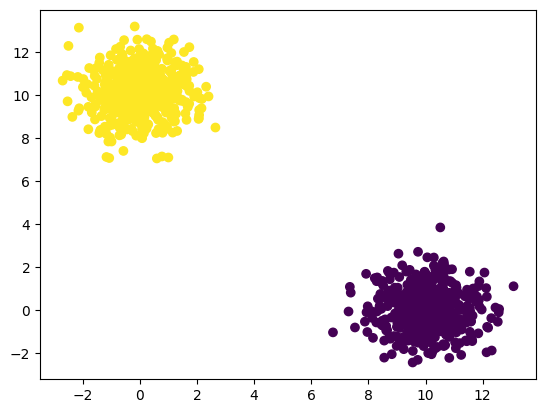

In [48]:
X, Y = make_blobs(n_features=2, centers=[(10, 0), (0, 10)], random_state=RANDOM_STATE, cluster_std=1, n_samples=1000)
plt.scatter(X[:, 0], X[:, 1], c=Y)

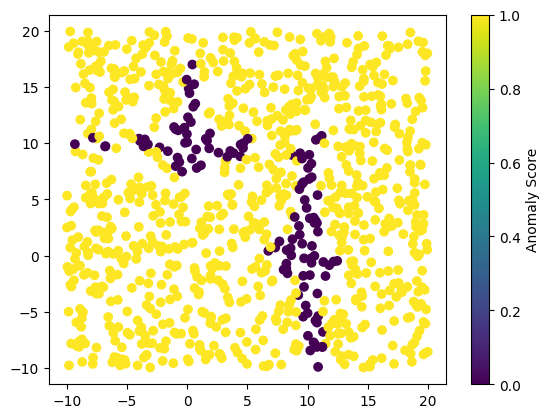

In [49]:
iforest = IForest(contamination=0.02)
iforest.fit(X)

X_test_data = np.random.uniform(low=-10, high=20, size=(1000, 2))
y_test_data = iforest.predict(X_test_data)

scatter = plt.scatter(X_test_data[:, 0], X_test_data[:, 1], c=y_test_data)
plt.colorbar(scatter, label='Anomaly Score')

In [50]:
y_test_data_iforest = iforest.predict(X_test_data)

dif = DIF(contamination=0.02)
dif.fit(X)
y_test_data_dif = dif.predict(X_test_data)

loda = LODA(contamination=0.02)
loda.fit(X)
y_test_data_loda = loda.predict(X_test_data)

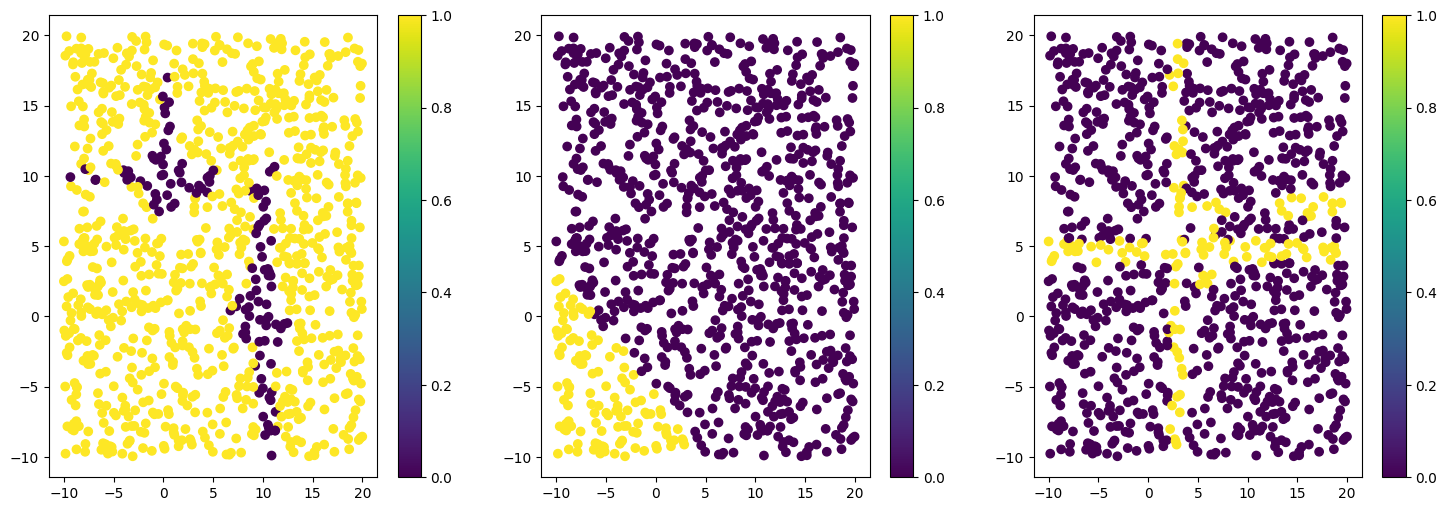

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sc0 = axs[0].scatter(X_test_data[:, 0], X_test_data[:, 1], c=y_test_data_iforest)
sc1 = axs[1].scatter(X_test_data[:, 0], X_test_data[:, 1], c=y_test_data_dif)
sc2 = axs[2].scatter(X_test_data[:, 0], X_test_data[:, 1], c=y_test_data_loda)
plt.colorbar(sc0, ax=axs[0])
plt.colorbar(sc1, ax=axs[1])
plt.colorbar(sc2, ax=axs[2])

### Different number of neurons for DIF

In [52]:
dif1 = DIF(contamination=0.02, hidden_neurons=[64, 32, 32])
dif1.fit(X)
y_test_data_dif_1 = dif1.predict(X_test_data)

dif2 = DIF(contamination=0.02, hidden_neurons=[128, 64, 32])
dif2.fit(X)
y_test_data_dif_2 = dif2.predict(X_test_data)

dif3 = DIF(contamination=0.02, hidden_neurons=[128, 64, 64, 32])
dif3.fit(X)
y_test_data_dif_3 = dif3.predict(X_test_data)

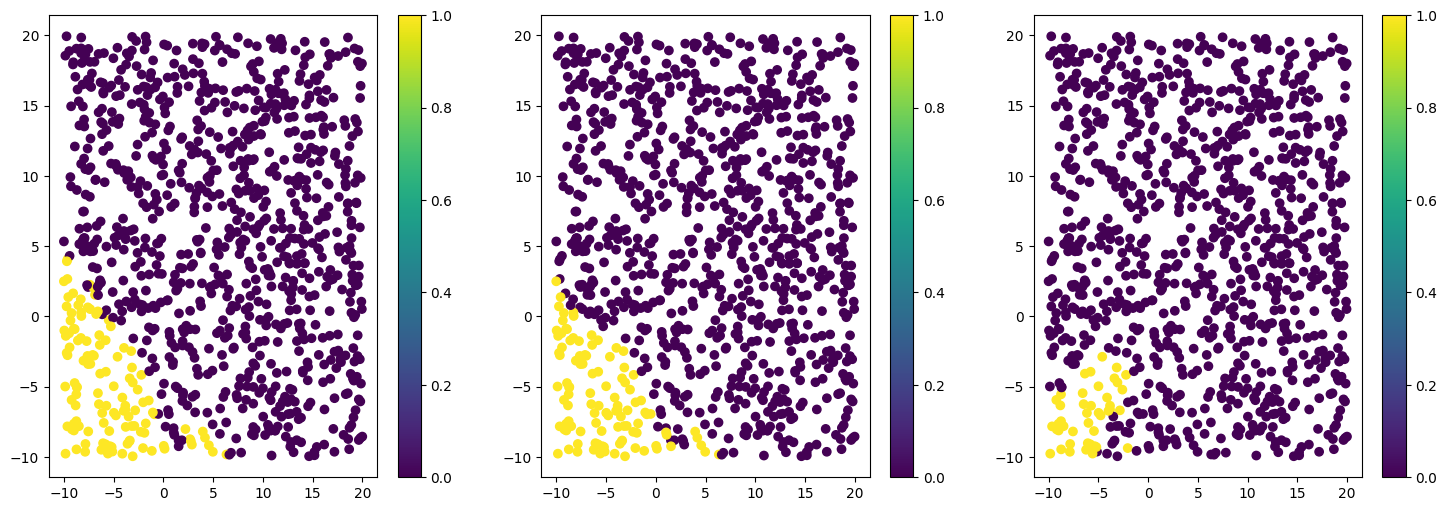

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sc1 = axs[0].scatter(X_test_data[:, 0], X_test_data[:, 1], c=y_test_data_dif_1)
sc2 = axs[1].scatter(X_test_data[:, 0], X_test_data[:, 1], c=y_test_data_dif_2)
sc3 = axs[2].scatter(X_test_data[:, 0], X_test_data[:, 1], c=y_test_data_dif_3)
plt.colorbar(sc1, ax=axs[0])
plt.colorbar(sc2, ax=axs[1])
plt.colorbar(sc3, ax=axs[2])

### Different number of bins for LODA

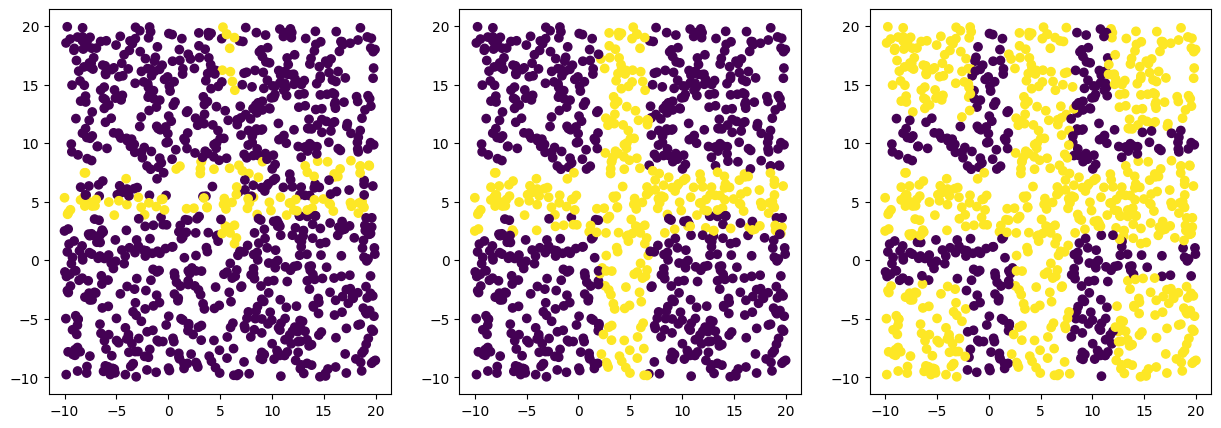

In [54]:
loda1 = LODA(contamination=0.02, n_bins=10)
loda1.fit(X)
y_test_data_loda_1 = loda1.predict(X_test_data)

loda2 = LODA(contamination=0.02, n_bins=20)
loda2.fit(X)
y_test_data_loda_2 = loda2.predict(X_test_data) 

loda3 = LODA(contamination=0.02, n_bins=30)
loda3.fit(X)
y_test_data_loda_3 = loda3.predict(X_test_data)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X_test_data[:, 0], X_test_data[:, 1], c=y_test_data_loda_1)
axs[1].scatter(X_test_data[:, 0], X_test_data[:, 1], c=y_test_data_loda_2)
axs[2].scatter(X_test_data[:, 0], X_test_data[:, 1], c=y_test_data_loda_3)
plt.show()

### 3D data

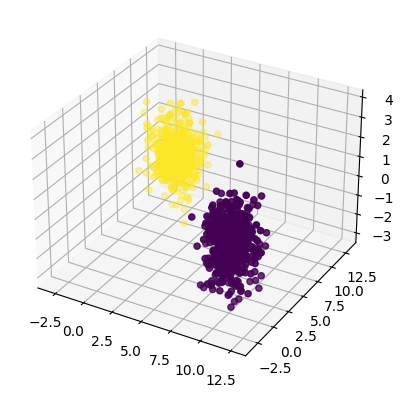

In [55]:
X_3d, Y_3d = make_blobs(n_features=3, centers=[(10, 0, 0), (0, 10, 0)], random_state=RANDOM_STATE, cluster_std=1, n_samples=1000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=Y_3d)

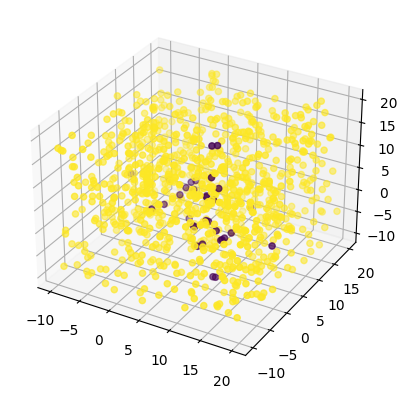

In [56]:
iforest = IForest(contamination=0.02)
iforest.fit(X_3d)

X_test_data_3d = np.random.uniform(low=-10, high=20, size=(1000, 3))
y_test_data_3d = iforest.predict(X_test_data_3d)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_data_3d[:, 0], X_test_data_3d[:, 1], X_test_data_3d[:, 2], c=y_test_data_3d)

In [57]:
y_test_data_iforest_3d = iforest.predict(X_test_data_3d)

dif = DIF(contamination=0.02)
dif.fit(X_3d)
y_test_data_dif_3d = dif.predict(X_test_data_3d)

loda = LODA(contamination=0.02)
loda.fit(X_3d)
y_test_data_loda_3d = loda.predict(X_test_data_3d)


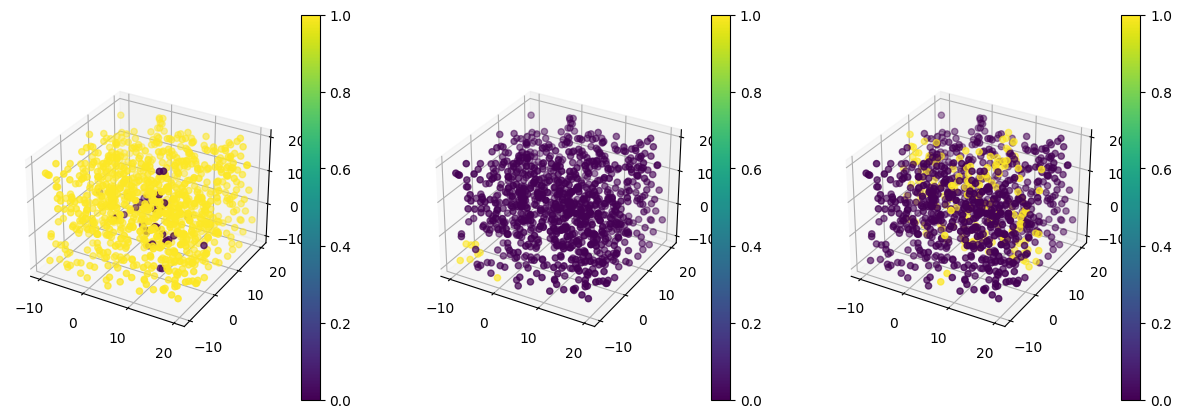

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})
sc0 = axs[0].scatter(X_test_data_3d[:, 0], X_test_data_3d[:, 1], X_test_data_3d[:, 2], c=y_test_data_iforest_3d)
sc1 = axs[1].scatter(X_test_data_3d[:, 0], X_test_data_3d[:, 1], X_test_data_3d[:, 2], c=y_test_data_dif_3d)
sc2 = axs[2].scatter(X_test_data_3d[:, 0], X_test_data_3d[:, 1], X_test_data_3d[:, 2], c=y_test_data_loda_3d)
plt.colorbar(sc0, ax=axs[0])
plt.colorbar(sc1, ax=axs[1])
plt.colorbar(sc2, ax=axs[2])